In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os

/home/valentin/.local/lib/python3.11/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
sns.set_theme()

In [3]:
def to_categories(df):
    type_dict = dict.fromkeys(df.select_dtypes('object'), 'category')
    return df.astype(type_dict)

def to_object(df):
    type_dict = dict.fromkeys(df.select_dtypes('category'), 'object')
    return df.astype(type_dict)

In [4]:
athletes = pd.read_csv('data/athletes_full.csv')
athletes = athletes.astype(dict.fromkeys(athletes.select_dtypes('object'), 'category'))

In [5]:
athletes_roles = pd.read_csv('data/athletes_roles.csv')
noc_countries = pd.read_csv('data/noc_countries.csv')
host_cities = pd.read_csv('data/games.csv')

In [109]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476348 entries, 0 to 476347
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   id            476348 non-null  int64   
 1   name          476348 non-null  category
 2   gender        476348 non-null  category
 3   born          466954 non-null  category
 4   died          115968 non-null  category
 5   height        348837 non-null  float64 
 6   weight        339742 non-null  float64 
 7   team          476348 non-null  category
 8   game          476348 non-null  category
 9   noc           476348 non-null  category
 10  sport         476348 non-null  category
 11  event         476348 non-null  category
 12  medal         66026 non-null   category
 13  roles         476348 non-null  category
 14  country       476348 non-null  category
 15  host_city     476348 non-null  category
 16  host_noc      476348 non-null  category
 17  year          476348 non-null

In [105]:
athletes.head()

,name,gender,born,died,height,weight,team,game,noc_x,sport,...,game_year,game_name,roles,country,Unnamed: 0,host_city,noc_y,year,season,competition
0,Meryem Erdoğan,Female,1990-04-24,NaN,172.0,55.0,Türkiye,2016 Summer Olympics,TUR,Athletics,...,Athletics,"Marathon, Women(Olympic)",Competed in Olympic Games,Türkiye,11,Rio de Janeiro,BRA,2016,Other,Summer Olympics
1,Meryem Erdoğan,Female,1990-04-24,NaN,172.0,55.0,Türkiye,2020 Summer Olympics,TUR,Athletics,...,Athletics,"Marathon, Women(Olympic)",Competed in Olympic Games,Türkiye,7,Tokyo,JPN,2020,Other,Summer Olympics
2,Meryem Erdoğan,Female,1990-04-24,NaN,172.0,55.0,Türkiye,2020 Summer Olympics,TUR,Athletics,...,Athletics,"Marathon, Women(Olympic)",Competed in Olympic Games,Türkiye,7,Tokyo,JPN,2020,Other,Summer Olympics
3,Maurice Maina,Male,1963-01-01,NaN,158.0,47.0,Kenya,1988 Summer Olympics,KEN,Boxing,...,Boxing,"Light-Flyweight, Men(Olympic)",Competed in Olympic Games,Kenya,29,Seoul,KOR,1988,Other,Summer Olympics
4,Maurice Maina,Male,1963-01-01,NaN,158.0,47.0,Kenya,1988 Summer Olympics,KEN,Boxing,...,Boxing,"Light-Flyweight, Men(Olympic)",Competed in Olympic Games,Kenya,29,Seoul,KOR,1988,Other,Summer Olympics


In [111]:
sports = athletes['sport'].unique()
print(sports)

0         Athletics
1         Athletics
2         Athletics
3            Boxing
4            Boxing
            ...    
476343      Fencing
476344      Fencing
476345      Fencing
476346      Fencing
476347      Fencing
Name: sport, Length: 476348, dtype: category
Categories (112, object): ['3x3 Basketball (Basketball)', 'Aeronautics (Air Sports)', 'Alpine Skiing (Skiing)', 'Alpinism', ..., 'Weightlifting', 'Winter Pentathlon', 'Wrestling', 'Wushu']


In [115]:
sports = athletes['sport'].unique()
print(sports)

['Athletics', 'Boxing', 'Wrestling', 'Sailing', 'Speed Skating (Skating)', ..., 'Racquets', 'Skijoring (Skiing)', 'Canne De Combat', 'Roller Skating (Roller Sports)', 'Aeronautics (Air Sports)']
Length: 112
Categories (112, object): ['3x3 Basketball (Basketball)', 'Aeronautics (Air Sports)', 'Alpine Skiing (Skiing)', 'Alpinism', ..., 'Weightlifting', 'Winter Pentathlon', 'Wrestling', 'Wushu']


## Number of medals in 2020

In [82]:
sub_athletes = athletes[(athletes['medal'].notnull()) & (athletes['year'] == 2020)]
sub_count = sub_athletes['country'].value_counts()
top_gold_medals = sub_count.reset_index(name='medal').head(15)
top_gold_medals

,country,medal
0,United States,605
1,People's Republic of China,349
2,ROC,278
3,France,263
4,Japan,245
5,Great Britain,240
6,Australia,232
7,Spain,211
8,Canada,156
9,New Zealand,139


Text(0.5, 1.0, 'Medals per Country in 2020')

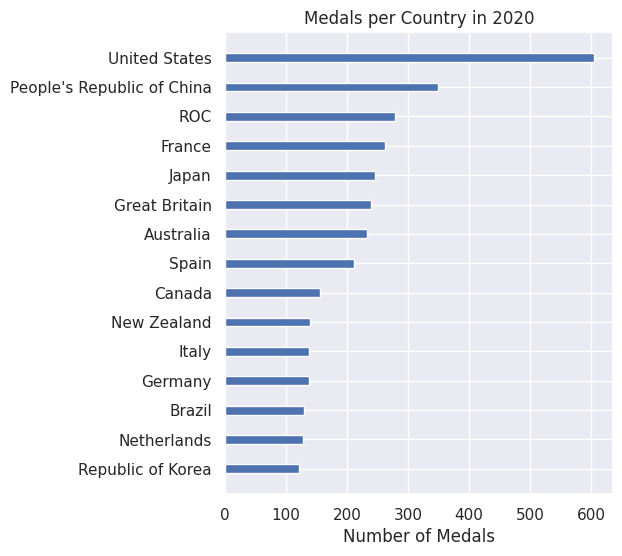

In [83]:
fig, ax = plt.subplots(figsize=(5,6))
plt.barh(y="country", width="medal", data=top_gold_medals, height=.3)
ax.invert_yaxis()
plt.xlabel("Number of Medals")
plt.title('Medals per Country in 2020')

In [120]:
host_cities['competition'].unique()

array(['Winter Olympics', 'Summer Olympics', 'Youth Olympics',
       'Equestrian Olympics', 'Intercalated Games',
       'Zappas Olympic Games'], dtype=object)

In [121]:
host_cities

,game,host_city,noc,year,season,competition
0,2034 Winter Olympics,Salt Lake City,USA,2034,Other,Winter Olympics
1,2032 Summer Olympics,Brisbane,AUS,2032,Other,Summer Olympics
2,2030 Winter Olympics,French Alps,FRA,2030,Other,Winter Olympics
3,2028 Summer Olympics,Los Angeles,USA,2028,Other,Summer Olympics
4,2026 Winter Olympics,Milano-Cortina d'Ampezzo,ITA,2026,Other,Winter Olympics
...,...,...,...,...,...,...
63,1906 Intercalated Games,Athina,GRE,1906,Other,Intercalated Games
64,1904 Summer Olympics,St. Louis,USA,1904,Other,Summer Olympics
65,1900 Summer Olympics,Paris,FRA,1900,Other,Summer Olympics
66,1896 Summer Olympics,Athina,GRE,1896,Other,Summer Olympics


In [204]:
sub_host_cities = host_cities[(host_cities['competition'] == 'Summer Olympics')]
sub_count = sub_host_cities['noc'].value_counts()
top_hoster = sub_count.reset_index(name='host_summer').set_index('noc')
sub_host_cities = host_cities[(host_cities['competition'] == 'Winter Olympics')]
sub_count = sub_host_cities['noc'].value_counts()
top_hoster['host_winter'] = sub_count
sub_count = host_cities['noc'].value_counts()
top_hoster['total'] = sub_count
top_hoster = top_hoster.merge(noc_countries, on='noc', how='left')
top_hoster.sort_values(by=['total', 'host_summer', 'host_winter'], ascending=False, inplace=True)
# top_hoster = top_hoster.head(10)

In [205]:
top_hoster

,noc,host_summer,host_winter,total,country
0,USA,5,5.0,10,United States
2,FRA,3,4.0,7,France
4,JPN,2,2.0,4,Japan
5,GRE,2,NaN,4,Greece
11,ITA,1,3.0,4,Italy
1,AUS,3,NaN,3,Australia
3,GBR,3,NaN,3,Great Britain
14,CAN,1,2.0,3,Canada
17,CHN,1,1.0,3,People's Republic of China
9,GER,1,1.0,2,Germany


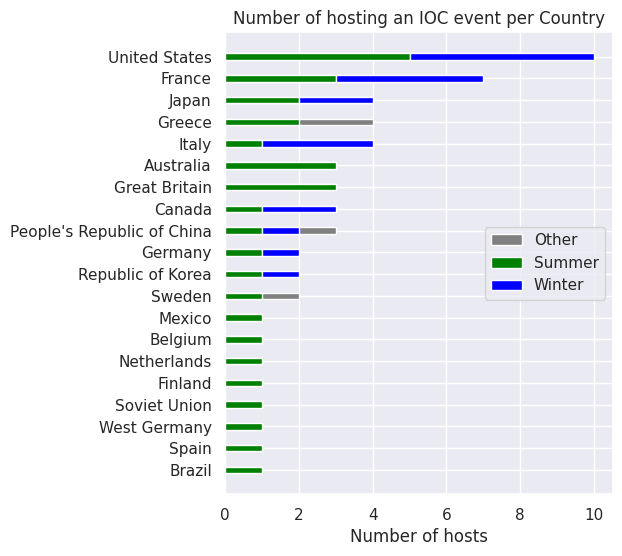

In [209]:
fig, ax = plt.subplots(figsize=(5,6))
plt.barh(y='country', width="total", data=top_hoster, height=.3, color='grey', label='Other')
plt.barh(y='country', width="host_summer", data=top_hoster, height=.3, color='green', label='Summer')
plt.barh(y='country', width="host_winter", left="host_summer", data=top_hoster, height=.3, color='blue', label='Winter')
ax.invert_yaxis()
plt.xlabel("Number of hosts")
plt.title('Number of hosting an IOC event per Country')
plt.legend()

## Athletes stats

In [210]:
sub_athletes = athletes[athletes['year'] > 2000]
sub_athletes_group = sub_athletes.groupby('sport')
sub_sports = sports[:10]

/tmp/ipykernel_7675/1301085119.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sub_athletes_group = sub_athletes.groupby('sport')


/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


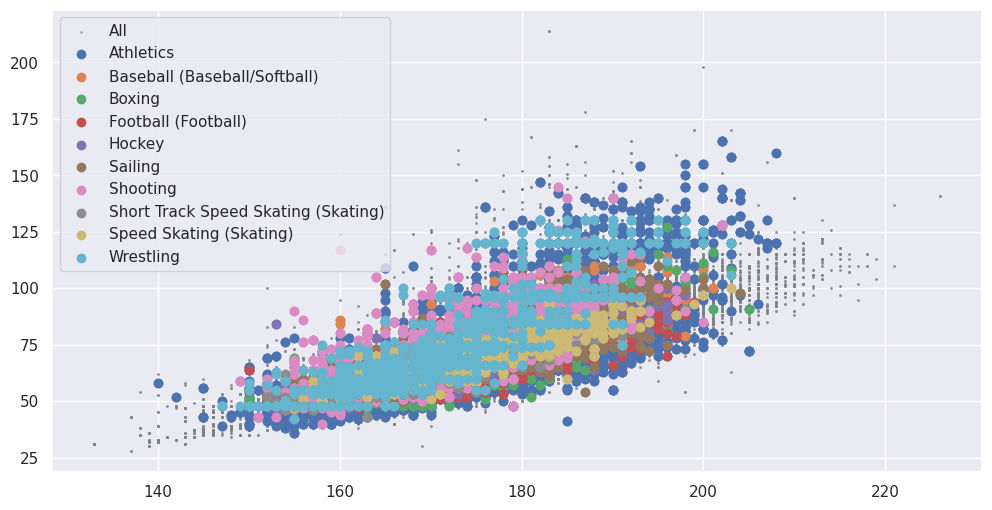

In [211]:
fig, ax = plt.subplots(figsize=(12,6))
plt.scatter(x='height', y='weight', data=sub_athletes, label='All', c='grey', alpha=.5, s=1)
for name, sport in sub_athletes_group:
    if name in sub_sports:
        plt.scatter(x='height', y='weight', data=sport, label=name)
plt.legend()

In [5]:
sub_athletes = athletes[(athletes['year'] > 1800) & (athletes['sport'] == 'Athletics') & (athletes['gender'] == 'Male')]
sub_athletes_group = sub_athletes.groupby('event')

/tmp/ipykernel_1707/2100411496.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sub_athletes_group = sub_athletes.groupby('event')


In [6]:
events = [ 'Athletics, 100 metres, Men(Olympic)',
 'Athletics, Marathon, Men(Olympic)']

In [38]:
def score(medal):
    if medal == 'Bronze':
        return 1
    elif medal == 'Silver':
        return 2
    elif medal == 'Gold':
        return 3
    else:
        return 0

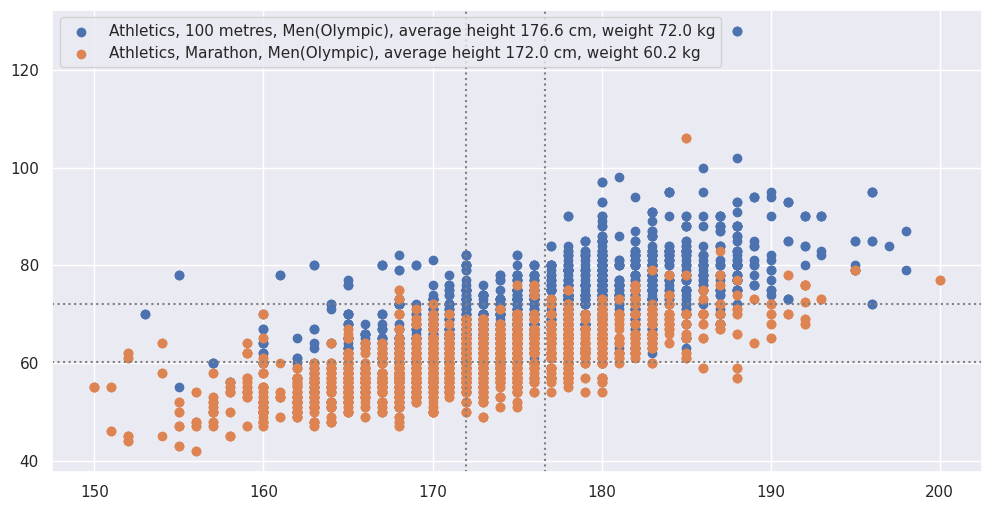

In [85]:
fig, ax = plt.subplots(figsize=(12,6))
#plt.scatter(x='height', y='weight', data=athletes, label='All', c='grey', alpha=.5, s=.5)
for name, group in sub_athletes_group:
    if name in events:
        mean_height = group['height'].mean()
        mean_weight = group['weight'].mean()
        
        plt.axvline(x=mean_height, color='grey', linestyle=':')
        plt.axhline(y=mean_weight, color='grey', linestyle=':')
        
        plt.scatter(x='height', y='weight', data=group, 
                    label=f'{name}, average height {mean_height:.1f} cm, weight {mean_weight:.1f} kg')
                
plt.legend()
plt.xlabel('Height (cm)')
plt.xlabel('Weight (kg)')

In [15]:
sub_athletes = athletes[(athletes['medal'].notnull()) & (athletes['year'] > 2000) & (athletes['sport'] == 'Swimming (Aquatics)')]
sub_athletes_group = sub_athletes.groupby('medal')

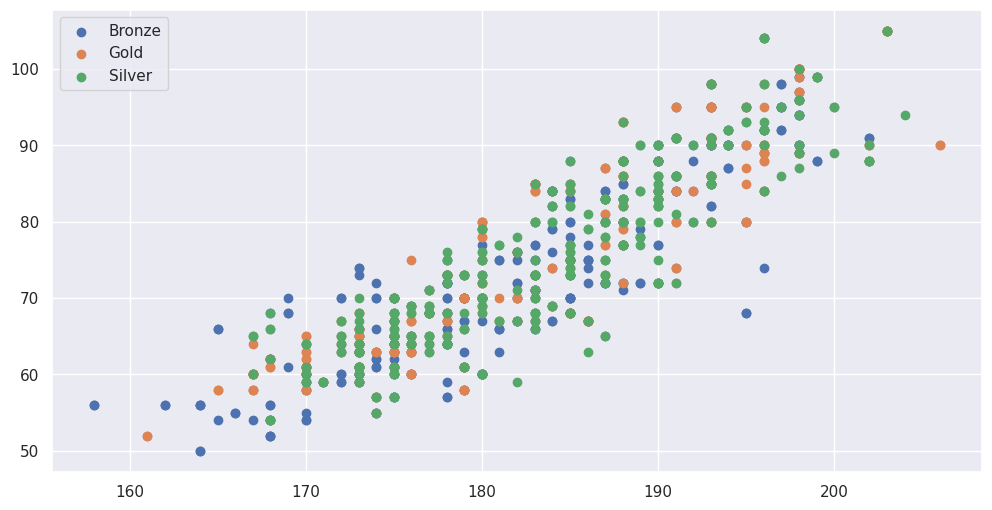

In [16]:
fig, ax = plt.subplots(figsize=(12,6))
#plt.scatter(x='height', y='weight', data=athletes, label='All', c='grey', alpha=.5, s=.5)
for name, group in sub_athletes_group:
    plt.scatter(x='height', y='weight', data=group, label=name)
plt.legend()

## Sports

In [32]:
sub_athletes = athletes[athletes['season']=='Summer']
sport_year = sub_athletes.pivot_table(athletes, index=['year','sport'], aggfunc=lambda x: len(x.unique()))
sport_year = sport_year.reset_index()[['year','sport','event']] # keep only these columns
sport_year = to_object(sport_year)
#sport_year = sport_year.set_index('year')
#sport_year = sport_year.sort_values(by="year", ascending=False)
#sport_year = sport_year.reindex(sport_year.sort_values(by=2020, ascending=False).index)
sport_year = sport_year.pivot(index='sport', columns='year', values='event')
sport_year.fillna(0, inplace=True)
sport_year['total'] = sport_year[:].sum(axis=1)
sport_year = sport_year.sort_values(by=[2020, 2016, 'total'], ascending=False)
sport_year = sport_year.drop('total', axis=1)
sport_year = sport_year[sport_year[2020] != 0] # remove old sports

/tmp/ipykernel_3075/1976105167.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sport_year = sub_athletes.pivot_table(athletes, index=['year','sport'], aggfunc=lambda x: len(x.unique()))


Text(141.24999999999997, 0.5, 'Sport')

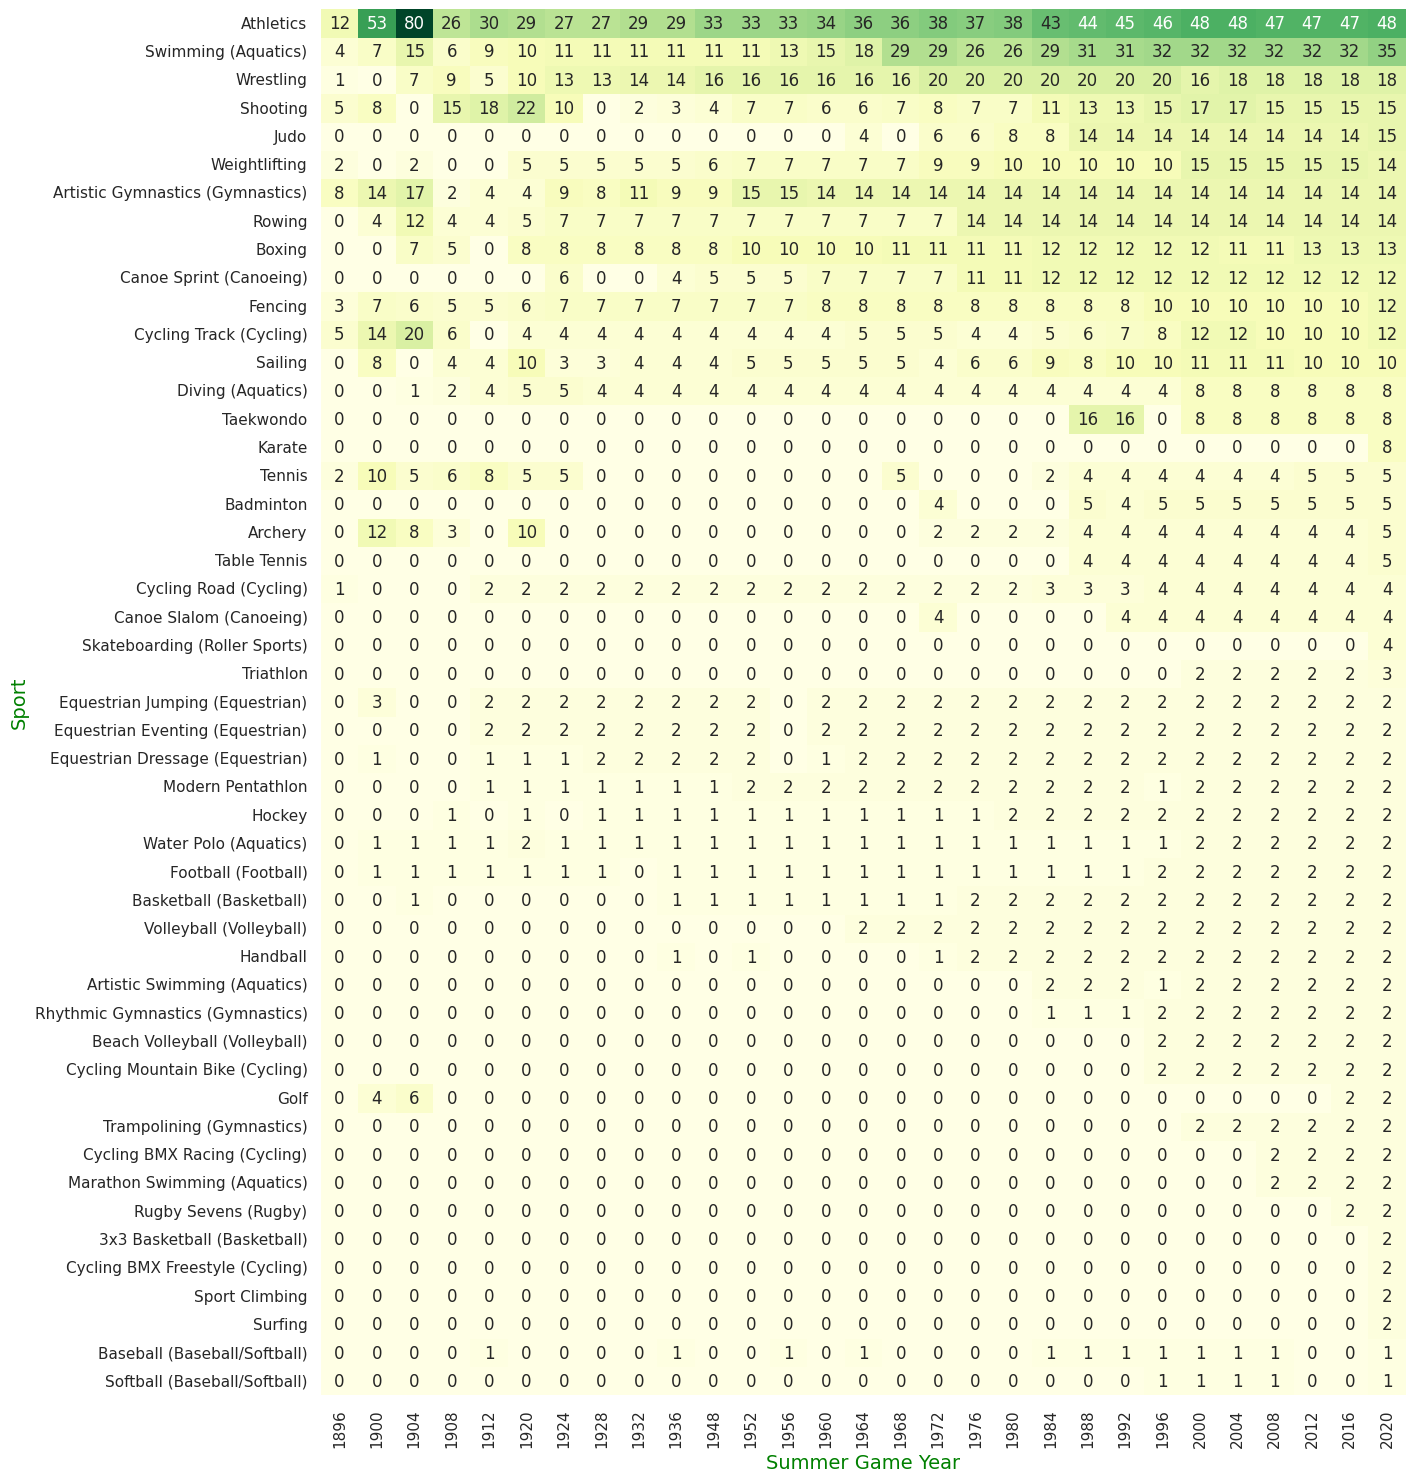

In [36]:
fig, ax = plt.subplots(figsize=(14, 18))
sns.heatmap(sport_year, annot=True, ax=ax, cmap="YlGn", cbar=False)
ax.set_xlabel('Summer Game Year', size=14, color="green")
ax.set_ylabel('Sport', size=14, color="green")